In [1]:

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt


In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [3]:
folder_path = 'Crop_Disease/Rice'


dataset = tf.keras.preprocessing.image_dataset_from_directory(
    folder_path,
    seed=123,
    shuffle=True,
    image_size=(255,255),
    batch_size=32
)


Found 4078 files belonging to 4 classes.


In [4]:

class_names = dataset.class_names
class_names

['Rice___Brown_Spot',
 'Rice___Healthy',
 'Rice___Leaf_Blast',
 'Rice___Neck_Blast']

In [5]:
dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 255, 255, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [6]:


# Check if the dataset is empty
print("Number of batches:", tf.data.experimental.cardinality(dataset).numpy())

# Iterate through the dataset
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

Number of batches: 128
(32, 255, 255, 3)
[1 0 1 1 0 1 2 3 3 3 1 1 3 3 2 3 1 1 0 1 1 1 0 3 1 3 1 0 1 2 0 3]


In [7]:
class_name= dataset.class_names
class_name

['Rice___Brown_Spot',
 'Rice___Healthy',
 'Rice___Leaf_Blast',
 'Rice___Neck_Blast']

In [8]:
len(dataset)

128

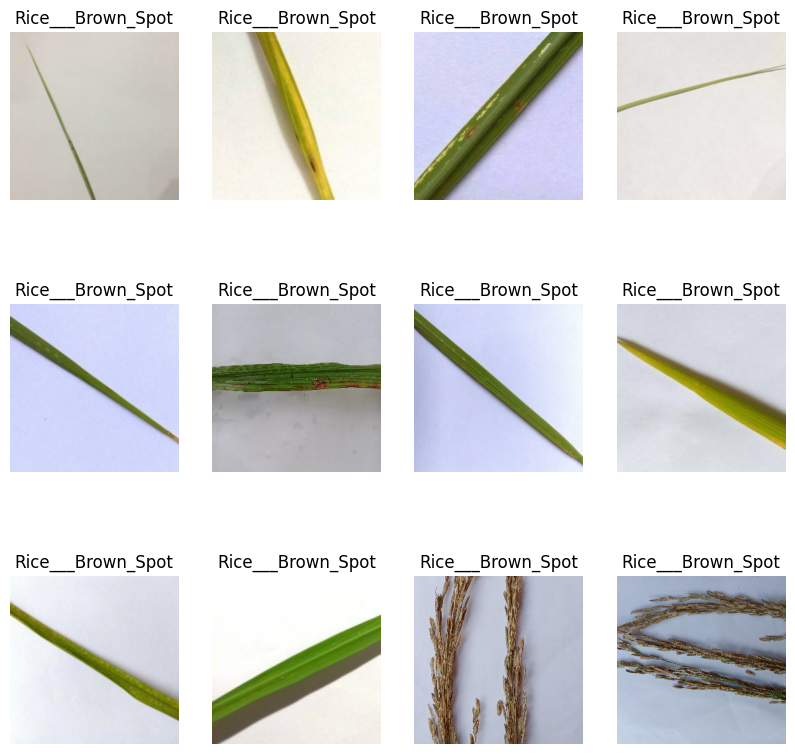

In [9]:
plt.figure(figsize=(10,10))
for images1 , labels1 in  dataset.take(1) :
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(images1[i].numpy().astype('int'))
        plt.axis('off')
        plt.title(class_name[labels1[i].numpy().argmax()])  

In [10]:
train_data=dataset.take(100)
len(train_data)

100

In [11]:
test_data=dataset.skip(100)
len(test_data)

28

In [12]:
val_ds = test_data.take(10)
len(val_ds)

10

In [13]:
test_ds = test_data.skip(10)
len(test_data)
print(len(list(test_ds)))

18


In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    print(ds_size)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

128


In [16]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(255, 255),
    layers.Rescaling(1./255),
])

In [17]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [18]:
n_classes = 4
input_shape = (255, 255, 3)  # Remove batch size

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),  # Define input shape
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


c:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 255, 255, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 253, 253, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [21]:
history = model.fit(
    train_ds,
    batch_size=32,
    validation_data=val_ds,
    verbose=1,
    epochs=40, 
)

Epoch 1/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.4167 - loss: 1.2474 - val_accuracy: 0.6562 - val_loss: 0.7633
Epoch 2/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.6030 - loss: 0.8322 - val_accuracy: 0.6120 - val_loss: 0.7627
Epoch 3/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.6383 - loss: 0.7799 - val_accuracy: 0.6016 - val_loss: 0.8210
Epoch 4/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.6546 - loss: 0.7345 - val_accuracy: 0.6849 - val_loss: 0.7078
Epoch 5/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.6932 - loss: 0.6973 - val_accuracy: 0.7161 - val_loss: 0.6510
Epoch 6/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.7154 - loss: 0.6556 - val_accuracy: 0.7350 - val_loss: 0.6192
Epoch 7/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.7195 - loss: 0.6454 - val_accuracy: 0.7268 - val_loss: 0.6352
Epoch 8/40
102/102 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.7544 - loss: 0.6207 - val_accu

In [35]:
scores = model.evaluate(test_ds)

14/14 ━━━━━━━━━━━━━━━━━━━━ 18s 290ms/step - accuracy: 0.9997 - loss: 0.0129


In [36]:
scores

[0.013617781922221184, 0.9977678656578064]

In [37]:
history

In [38]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 102}

In [39]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [41]:
print(len(acc), len(val_acc))  # Check lengths
print(len(loss), len(val_loss))  # Check lengths


40 40
40 40


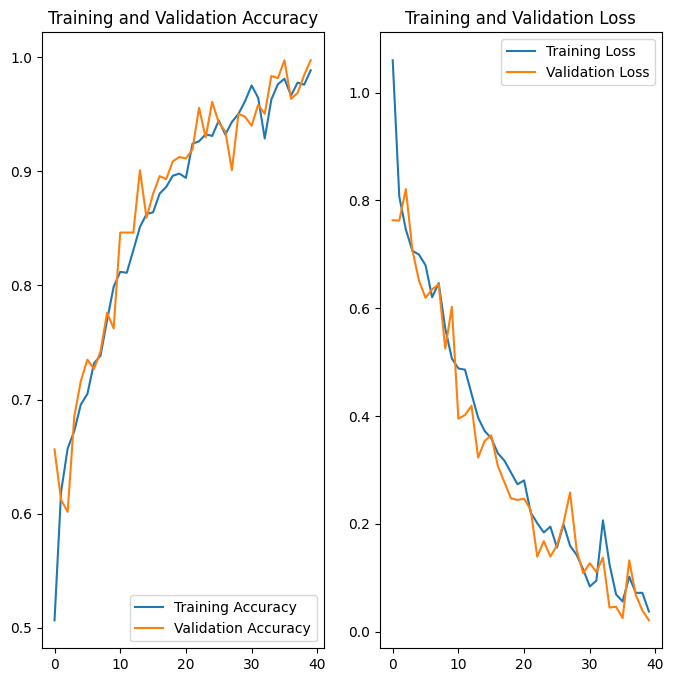

In [42]:
epochs = len(acc)  # or len(val_acc), since both are 20

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [ ]:
# model.save("rice.h5")


In [44]:
from PIL import Image
import numpy as np
image_path = "Crop_Disease\Rice\Rice___Leaf_Blast\IMG_2980.jpg" 
image = Image.open(image_path)
img_array = tf.keras.preprocessing.image.img_to_array(image)
img_array = tf.expand_dims(img_array, 0)

predictions=model.predict(img_array)

predictions

<>:3: SyntaxWarning: invalid escape sequence '\R'
<>:3: SyntaxWarning: invalid escape sequence '\R'
C:\Users\PMLS\AppData\Local\Temp\ipykernel_10968\1904399441.py:3: SyntaxWarning: invalid escape sequence '\R'
  image_path = "Crop_Disease\Rice\Rice___Leaf_Blast\IMG_2980.jpg"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


array([[1.9247100e-02, 1.9237070e-06, 9.8075104e-01, 3.0083769e-09]],
      dtype=float32)

In [32]:
predicted_class = class_names[np.argmax(predictions)]
print (predicted_class)
print (np.max(predictions))

Rice___Leaf_Blast
0.98075104


In [45]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions)), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


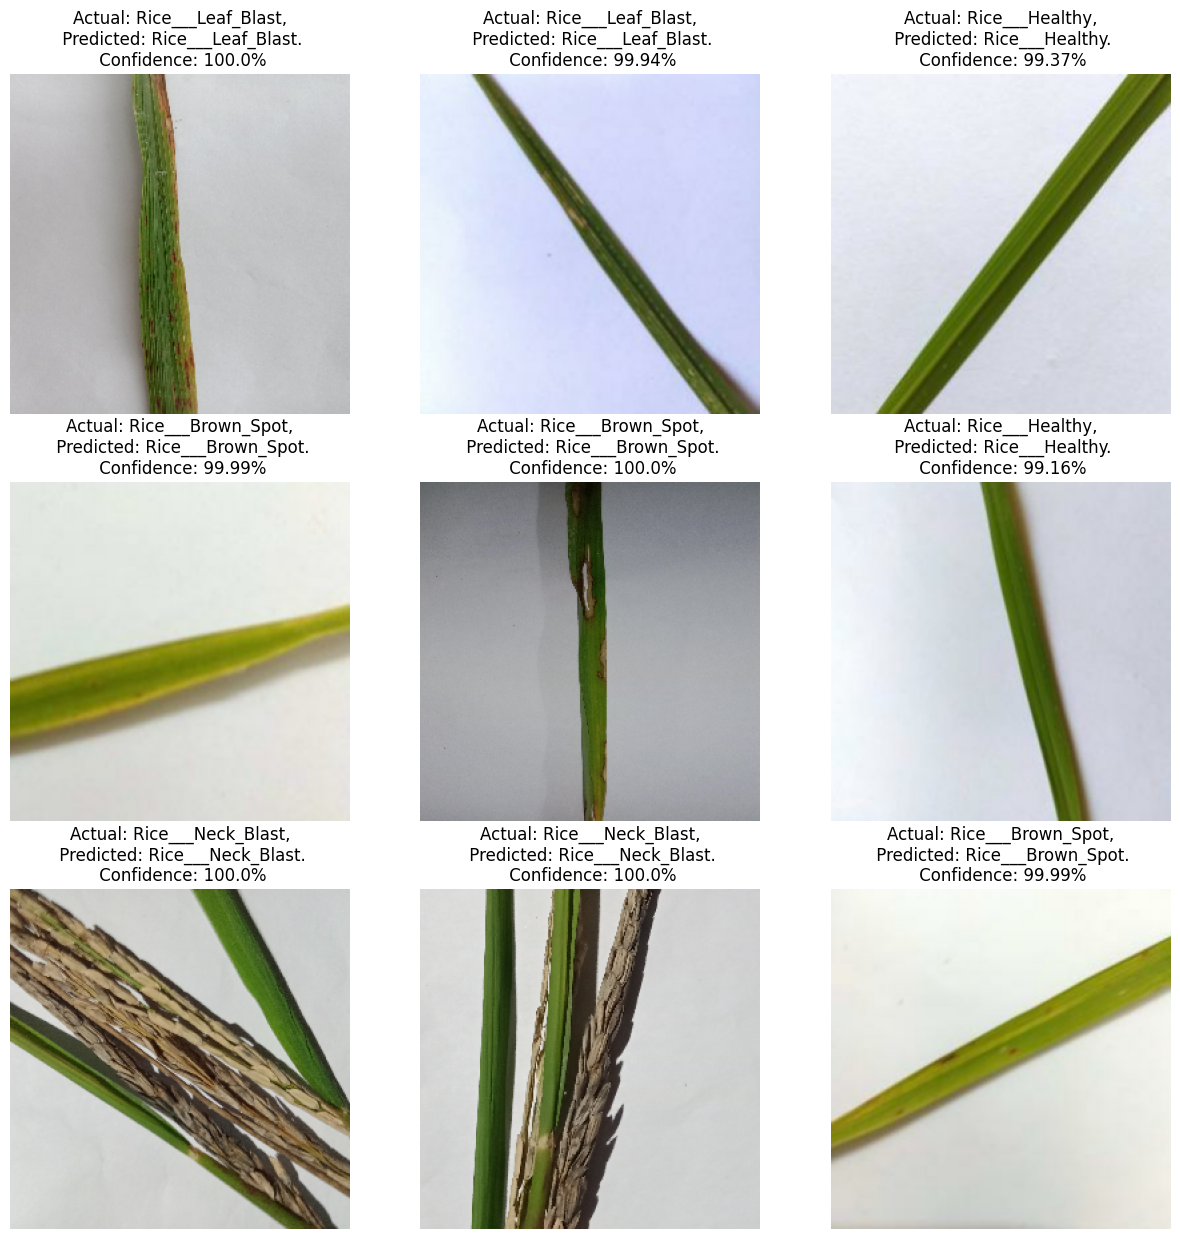

In [46]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("int"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")